In [52]:
import matplotlib
import matplotlib.pyplot as plt
import pyfits
from astropy.io import fits
import astropy.io.ascii as ascii 
import os
import numpy as np
from astropy import units as u
import pandas as pd
import matplotlib.gridspec as gridspec
import aplpy
from astropy.coordinates import Angle
from matplotlib_scalebar.scalebar import ScaleBar
###########################################################

plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=14
plt.rcParams['lines.linewidth']=2


In [62]:
def deg2HMS(ra='', dec='', round=False):
  RA, DEC, rs, ds = '', '', '', ''
  if dec:
    if str(dec)[0] == '-':
      ds, dec = '-', abs(dec)
    deg = int(dec)
    decM = abs(int((dec-deg)*60))
    if round:
      decS = int((abs((dec-deg)*60)-decM)*60)
    else:
      decS = (abs((dec-deg)*60)-decM)*60
    DEC = '{0}{1} {2} {3}'.format(ds, deg, decM, decS)
  
  if ra:
    if str(ra)[0] == '-':
      rs, ra = '-', abs(ra)
    raH = int(ra/15)
    raM = int(((ra/15)-raH)*60)
    if round:
      raS = int(((((ra/15)-raH)*60)-raM)*60)
    else:
      raS = ((((ra/15)-raH)*60)-raM)*60
    RA = '{0}{1} {2} {3}'.format(rs, raH, raM, raS)
  
  if ra and dec:
    return (RA, DEC)
  else:
    return RA or DEC

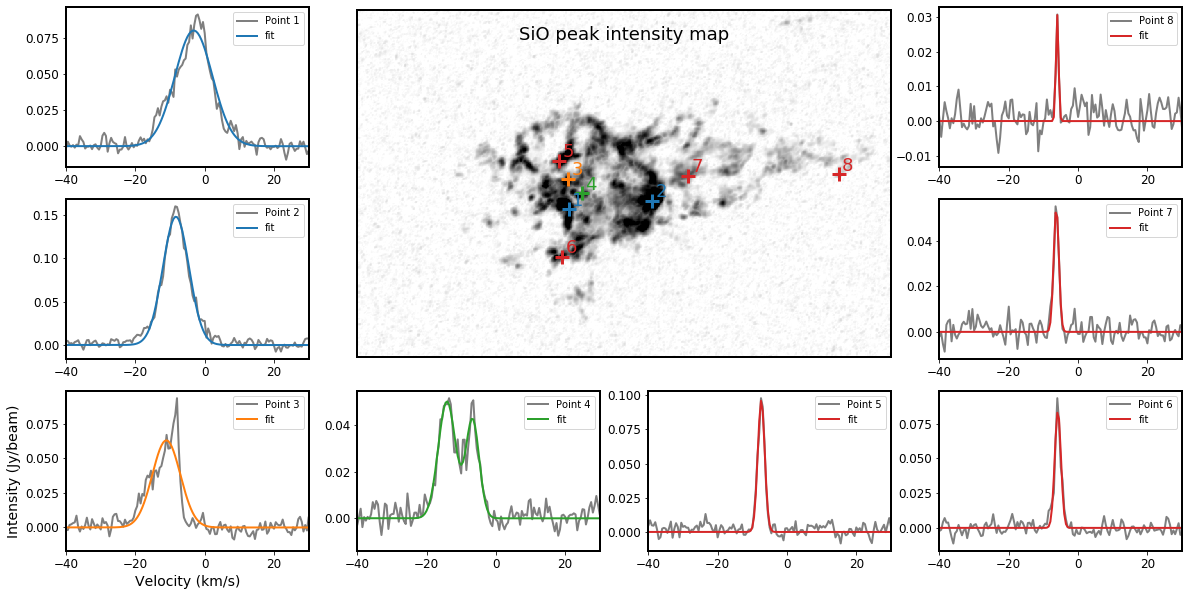

In [193]:
dirc ="sio_spectrums/"

# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,4)

#############################################################################

# small subplot 1
ax1= plt.subplot2grid((3,4), (0,0))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_1=np.loadtxt(dirc +'broad_p01.tsv')
vel_orig_1=spec_1[:,0]
intens_orig_1=spec_1[:,1]
intens_fit_1=spec_1[:,2]


ax1.plot(vel_orig_1, intens_orig_1, label='Point 1', color='tab:gray')
ax1.plot(vel_orig_1, intens_fit_1, label='fit', color='tab:blue')
plt.xlim(-40, 30)
#ax1.set_xlabel('Velocity (km/s)')
#ax1.set_ylabel('Intensity (Jy/beam)')

ax1.legend()

#############################################################################
# small subplot 2
ax2=plt.subplot2grid((3,4), (1,0))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
spec_2=np.loadtxt(dirc +'broad_p02.tsv')
vel_orig_2=spec_2[:,0]
intens_orig_2=spec_2[:,1]
intens_fit_2=spec_2[:,2]

ax2.plot(vel_orig_2, intens_orig_2, label='Point 2', color='tab:gray')
ax2.plot(vel_orig_2, intens_fit_2, label='fit', color='tab:blue')
plt.xlim(-40, 30)
#ax2.set_xlabel('Velocity (km/s)')
#ax2.set_ylabel('Intensity (Jy/beam)')
ax2.legend()
#############################################################################
# small subplot 3
ax3 =plt.subplot2grid((3,4), (2,0))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_3=np.loadtxt(dirc +'shift_p03.tsv')
vel_orig_3=spec_3[:,0]
intens_orig_3=spec_3[:,1]
intens_fit_3=spec_3[:,2]



ax3.plot(vel_orig_3, intens_orig_3, label='Point 3', color='tab:gray')
ax3.plot(vel_orig_3, intens_fit_3, label='fit', color='tab:orange')

plt.xlim(-40, 30)
ax3.set_xlabel('Velocity (km/s)')
ax3.set_ylabel('Intensity (Jy/beam)')
ax3.legend()

#############################################################################
# large subplot
ax0=plt.subplot2grid((3,4), (0,1), colspan=2, rowspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

hdu_image = fits.open('../../../data/alma_data/spw8_sio/SiO_automask_peak_delhead.fits')[0]
my_data = hdu_image.data
my_header = hdu_image.header
image11=ax0.imshow(my_data, cmap='gray_r', vmin=0.01, vmax=0.08)
'''
ra = ax0.coords[0]
ra.set_major_formatter('hh:mm:ss')
ra.set_ticks_position('bt')
dec = ax0.coords[1]
dec.set_major_formatter('dd:mm:ss')
dec.set_ticks_position('lr')
ax0.coords['ra'].set_axislabel('Right Ascension', fontsize=18)
ax0.coords['dec'].set_axislabel('Declination', fontsize=18)
ax0.tick_params(axis='x', labelsize=14)
ax0.tick_params(axis='y', labelsize=14)

# Un-comment if you want to remove axis labels and ticks
ra.set_ticklabel_visible(False)
ra.set_axislabel('')
dec.set_ticklabel_visible(False)
dec.set_axislabel('')
'''
# Define center and size of the image
my_xcenter = Angle(my_header['CRVAL1'], u.degree).degree
my_ycenter = Angle(my_header['CRVAL2'], u.degree).degree
my_box = 100.0/3600.0
my_xboxmin_pixel_ax11 = my_header['CRPIX1']-1+(my_xcenter-my_box/1.3-my_header['CRVAL1'])/my_header['CDELT1']
my_xboxmax_pixel_ax11 = my_header['CRPIX1']-1+(my_xcenter+my_box/1.3-my_header['CRVAL1'])/my_header['CDELT1']
my_yboxmin_pixel_ax11 = my_header['CRPIX2']-1+(my_ycenter-my_box/2.0-my_header['CRVAL2'])/my_header['CDELT2']
my_yboxmax_pixel_ax11 = my_header['CRPIX2']-1+(my_ycenter+my_box/2.0-my_header['CRVAL2'])/my_header['CDELT2']
ax0.set_xlim([my_xboxmax_pixel_ax11, my_xboxmin_pixel_ax11])
ax0.set_ylim([my_yboxmin_pixel_ax11, my_yboxmax_pixel_ax11])
plt.xticks([])
plt.yticks([])
#cax = plt.axes([ax0.get_position().corners()[0][0], ax0.get_position().corners()[1][1]+0.02*(ax0.get_position().corners()[1][1]-ax0.get_position().corners()[0][1]), ax0.get_position().corners()[2][0]-ax0.get_position().corners()[0][0], 0.02*(ax0.get_position().corners()[2][0]-ax0.get_position().corners()[0][0])])
#fig.colorbar(image11, cax=cax, orientation='horizontal', ticklocation='top', label='Intensity (Jy/beam)')
#fig.colorbar.set_axislabel('Intensity (Jy/beam)', fontsize=20)
#ax0.contour(htcop_img.data, colors='grey', levels=[0.025], transform=ax11.get_transform(wcs.WCS(htcop_img.header)), zorder=1)
my_text = "SiO peak intensity map"
ax0.text(my_xboxmax_pixel_ax11+0.5*(my_xboxmin_pixel_ax11-my_xboxmax_pixel_ax11), my_yboxmin_pixel_ax11+0.90*(my_yboxmax_pixel_ax11-my_yboxmin_pixel_ax11), my_text, fontsize=18, clip_on=False, horizontalalignment='center', verticalalignment='bottom')
#scalebar = ScaleBar(1, location='lower left')#ScaleBar(0.3/(1300*4.84813681e-6*3600), "0.3 pc", color='k', linewidth=3.0, fontsize = 22, corner='bottom left')
#ax0.add_artist(scalebar)


x_narr=[545.960, 550.264, 731.563, 949.427]
y_narr= [ 672.289, 534.055, 650.604, 652.889]
n_narr = [5, 6, 7, 8]
ax0.scatter(x_narr, y_narr, marker='+', s=200, color='tab:red', linewidth=3 )
for i, txt in enumerate(n_narr):
    ax0.annotate(txt, (x_narr[i]+5, y_narr[i]+5), color='tab:red', fontsize=18)
    
x_comp=579.108
y_comp=625.274
ax0.scatter(x_comp,y_comp, marker='+', s=200, color='tab:green', linewidth=3, label='point 4')
ax0.annotate(4, (x_comp+5, y_comp+5), color='tab:green', fontsize=18)


x_shift=559.033
y_shift=645.977
ax0.scatter(x_shift,y_shift, marker='+', s=200, color='tab:orange', linewidth=3, label='point 4')
ax0.annotate(3, (x_shift+5, y_shift+5), color='tab:orange', fontsize=18)
#ax0.legend()

x_br=[560.167,680.960]
y_br=[602.613,614.690]
n_br=[1, 2]
ax0.scatter(x_br, y_br, marker='+', s=200, color='tab:blue', linewidth=3 )
for i, txt in enumerate(n_br):
    ax0.annotate(txt, (x_br[i]+5, y_br[i]+5), color='tab:blue', fontsize=18)
#############################################################################

# small subplot 4 bottom left
ax4 =plt.subplot2grid((3,4), (2,1))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_4=np.loadtxt(dirc +'two_comp_1.tsv')
vel_orig_4=spec_4[:,0]
intens_orig_4=spec_4[:,1]
intens_fit_4=spec_4[:,2]



ax4.plot(vel_orig_4, intens_orig_4, label='Point 4', color='tab:gray')
ax4.plot(vel_orig_4, intens_fit_4, label='fit', color='tab:green')
plt.xlim(-40, 30)

#ax4.set_xlabel('Velocity (km/s)')
#ax4.set_ylabel('Intensity (Jy/beam)')
ax4.legend()
#############################################################################

# small subplot 4 bottom right
ax5 =plt.subplot2grid((3,4), (2,2))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_5=np.loadtxt(dirc +'narr_p05.tsv')
vel_orig_5=spec_5[:,0]
intens_orig_5=spec_5[:,1]
intens_fit_5=spec_5[:,2]



ax5.plot(vel_orig_5, intens_orig_5, label='Point 5', color='tab:gray')
ax5.plot(vel_orig_5, intens_fit_5, label='fit', color='tab:red')
plt.xlim(-40, 30)

#ax5.set_xlabel('Velocity (km/s)')
#ax5.set_ylabel('Intensity (Jy/beam)')
ax5.legend()

#############################################################################
# small subplot 6 Right bottom
ax6= plt.subplot2grid((3,4), (2,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_6=np.loadtxt(dirc +'narr_p6.tsv')
vel_orig_6=spec_6[:,0]
intens_orig_6=spec_6[:,1]
intens_fit_6=spec_6[:,2]


ax6.plot(vel_orig_6, intens_orig_6, label='Point 6', color='tab:gray')
ax6.plot(vel_orig_6, intens_fit_6, label='fit', color='tab:red')
plt.xlim(-40, 30)
#ax6.set_xlabel('Velocity (km/s)')
#ax6.set_ylabel('Intensity (Jy/beam)')

ax6.legend()
#############################################################################

# small subplot 7 Right middle
ax7= plt.subplot2grid((3,4), (1,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_7=np.loadtxt(dirc +'narr_p3.tsv')
vel_orig_7=spec_7[:,0]
intens_orig_7=spec_7[:,1]
intens_fit_7=spec_7[:,2]


ax7.plot(vel_orig_7, intens_orig_7, label='Point 7', color='tab:gray')
ax7.plot(vel_orig_7, intens_fit_7, label='fit', color='tab:red')
plt.xlim(-40, 30)
#ax7.set_xlabel('Velocity (km/s)')
#ax7.set_ylabel('Intensity (Jy/beam)')

ax7.legend()


#############################################################################
# small subplot 8 Right top
ax8= plt.subplot2grid((3,4), (0,3))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

spec_8=np.loadtxt(dirc +'narr_p4.tsv')
vel_orig_8=spec_8[:,0]
intens_orig_8=spec_8[:,1]
intens_fit_8=spec_8[:,2]


ax8.plot(vel_orig_8, intens_orig_8, label='Point 8', color='tab:gray')
ax8.plot(vel_orig_8, intens_fit_8, label='fit', color='tab:red')
plt.xlim(-40, 30)
#ax8.set_xlabel('Velocity (km/s)')
#ax8.set_ylabel('Intensity (Jy/beam)')

ax8.legend()

#############################################################################
# fit subplots and save fig
#fig.tight_layout()
fig.set_size_inches(w=20,h=10)
fig_name = 'Sio_Spectra.png'
fig.savefig('plots/'+fig_name)

In [ ]:
+